# `DSML_WS_07` - Regression 1

Please work on the following tasks **before** the seventh workshop session.

*Note*: Because of the double workshop, there is only one task to prepare for this workshop.

## 1. Introduction to advanced regression

This week, we will continue our regression journey and consider some more complex modeling techniques.

Let's once again use the familiar tips dataset from Seaborn. Execute the following cell to load the dataset.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


During the introductory task to linear regression, we manually constructed a regression line to predict the tip based on the total bill using the following simple linear model:
\begin{equation}
\mathrm{tip} \approx \theta_1 \cdot \mathrm{total\_bill} + \theta_2
\end{equation}
where $\theta_1$ is the slope of the line and $\theta_2$ is the intercept term.

Implement the linear regression using scikit learn to find the optimal values for the parameters and plot the regression line on top of a scatter plot of the observed values.

theta: 0.10502451738435337, intercept: 0.9202696135546731


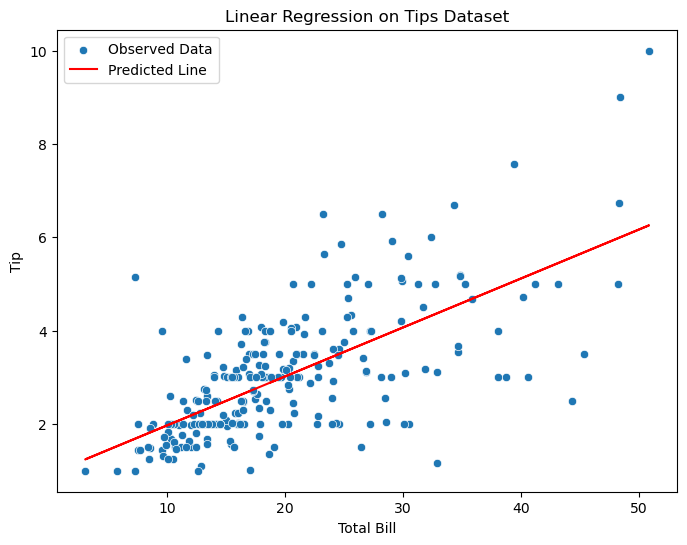

In [6]:
# your code here
x = tips["total_bill"].values.reshape(-1, 1)
y = tips["tip"]
model = LinearRegression()
model.fit(x,y)

theta = model.coef_[0]
intercept = model.intercept_
print(f"theta: {theta}, intercept: {intercept}")

tips["predicted_tip"] = model.predict(x)
tips.head()

plt.figure(figsize=(8, 6))
sns.scatterplot(x="total_bill", y="tip", data=tips, label="Observed Data")
plt.plot(tips["total_bill"], tips["predicted_tip"], color="red", label="Predicted Line")
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.legend()
plt.title("Linear Regression on Tips Dataset")
plt.show()

One obvious way to improve our predictions would be to add another feature. For example, are tips different when people eat for lunch compared to dinner? Add the `time` feature to your regression by doing the following:
- Recode the `time` feature so that "Lunch" is 0 and "Dinner" is 1.
- Define your feature matrix `X` to include both `total_bill` and `time_recoded`.
- Re-run your linear regression.
- Plot a scatter plot with the observed lunch tips and dinner tips in different colors, as well as the respective regression lines.

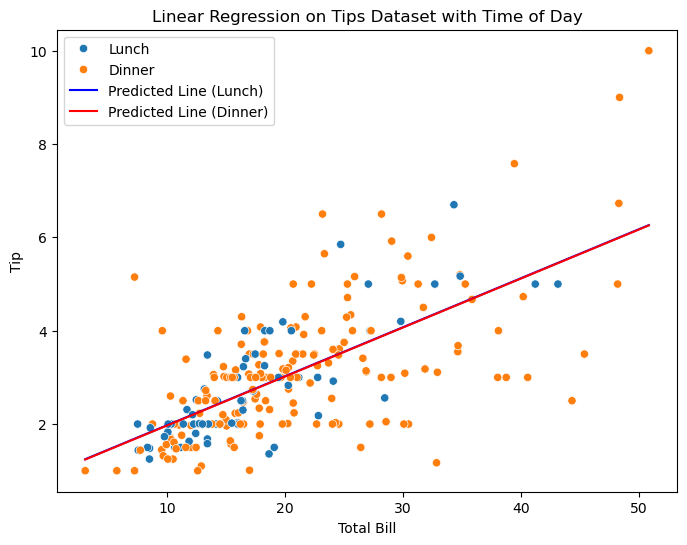

In [11]:
# your code here
tips = sns.load_dataset("tips")
tips["time_recorded"] = tips["time"].map({"Lunch": 0, "Dinner": 1})
x = tips[["total_bill", "time_recorded"]]
y = tips["tip"]
model = LinearRegression()
model.fit(x, y)

theta_1, theta_2 = model.coef_
theta_3 = model.intercept_

tips["predicted_tip"] = model.predict(x)
plt.figure(figsize=(8, 6))
sns.scatterplot(x="total_bill", y="tip",hue = "time",  data=tips)
x_range = pd.DataFrame({"total_bill": sorted(tips["total_bill"].unique())})
for time_val, color in zip([0, 1], ["blue", "red"]):
    x_range["time_recorded"] = time_val
    y_range = model.predict(x_range)
    plt.plot(x_range["total_bill"], y_range, color=color, label=f"Predicted Line ({'Lunch' if time_val == 0 else 'Dinner'})")

plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.legend()
plt.title("Linear Regression on Tips Dataset with Time of Day")
plt.show()

What do you think? Is it useful to add this feature?